In [218]:
import random 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [219]:
data = pd.read_excel(r'C:\Users\Imad\Desktop\New folder\absent.xls')

In [220]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [221]:
data.columns = data.columns.str.strip()

In [222]:
data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [227]:
data_in = data[['Reason for absence','Distance from Residence to Work','Age','Disciplinary failure','Pet','Absenteeism time in hours']]

In [228]:
data_in.head()

,Reason for absence,Distance from Residence to Work,Age,Disciplinary failure,Pet,Absenteeism time in hours
0,26,36,33,0,1,4
1,0,13,50,1,0,0
2,23,51,38,0,0,2
3,7,5,39,0,0,4
4,23,36,33,0,1,2


C:\Users\Imad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Imad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


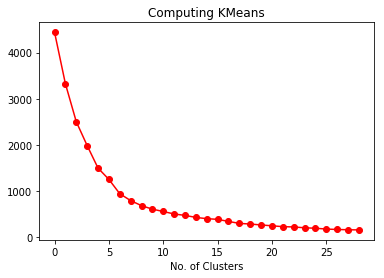

In [246]:
X = data_in.values[:,1:]
X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)

from sklearn.cluster import KMeans
# Use the Elbow method to find a good number of clusters using WCSS
wcss = []
for i in range( 1, 30 ):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( X )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-',)
plt.title("Computing KMeans")
plt.xlabel("No. of Clusters")
plt.ylabel("")
plt.show()

In [255]:
k = 5
k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 4 1 0 4 0 4 1 1 4 4 4 4 4 4 4 4 0 4 1 4 0 4 0 0 0 0 0 4 4 0 1 0 4 0 0
 4 0 4 0 1 4 1 1 1 4 4 4 1 2 2 0 1 2 2 0 4 2 4 4 4 4 1 2 0 4 0 1 0 4 4 4 0
 4 4 0 0 0 4 4 0 4 4 4 1 0 1 0 1 0 4 0 4 4 0 1 4 4 3 1 1 0 4 3 0 0 4 0 0 1
 4 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 4 4 1 0 4 0 1 1 0 0
 0 0 0 1 1 0 0 4 4 0 4 4 4 0 4 4 1 1 4 1 0 4 4 0 1 4 0 0 0 0 0 4 1 0 4 0 4
 0 1 1 1 0 4 4 1 4 4 4 4 3 0 1 0 0 1 2 0 1 1 4 0 0 1 4 1 2 2 2 2 4 1 0 4 0
 1 4 4 4 1 4 1 1 1 3 0 4 4 0 1 1 1 1 1 0 1 1 1 0 0 0 4 1 0 2 0 0 0 1 4 4 4
 0 4 1 0 1 4 1 1 1 0 0 4 4 1 2 4 4 2 2 4 1 4 4 4 1 1 2 4 1 4 0 1 0 0 2 2 0
 1 1 4 3 2 0 4 2 1 1 1 4 0 1 0 2 2 2 0 0 1 1 4 4 4 4 0 3 1 2 1 1 1 4 4 4 4
 4 4 4 2 2 4 0 4 4 1 1 4 4 4 4 0 1 1 4 1 1 4 0 4 0 0 1 1 1 1 0 4 1 1 4 4 1
 4 0 0 4 4 4 4 4 4 4 0 4 4 4 0 4 4 1 4 4 1 4 4 4 4 1 4 0 4 0 2 1 1 1 1 2 2
 2 4 0 4 4 4 4 1 1 4 1 4 1 3 4 4 4 1 1 4 1 0 4 0 4 4 4 1 0 1 0 1 1 0 1 4 1
 0 4 2 1 4 4 4 1 4 0 1 4 0 4 1 1 0 0 4 1 1 1 4 1 4 0 4 3 4 1 0 0 1 4 4 1 4
 4 4 1 0 1 4 4 4 1 1 4 1 

In [263]:
data_in["Cluster"] = labels
data_in.head(5)


,Reason for absence,Distance from Residence to Work,Age,Disciplinary failure,Pet,Absenteeism time in hours,Cluster
0,26,36,33,0,1,4,0
1,0,13,50,1,0,0,2
2,23,51,38,0,0,2,4
3,7,5,39,0,0,4,1
4,23,36,33,0,1,2,0


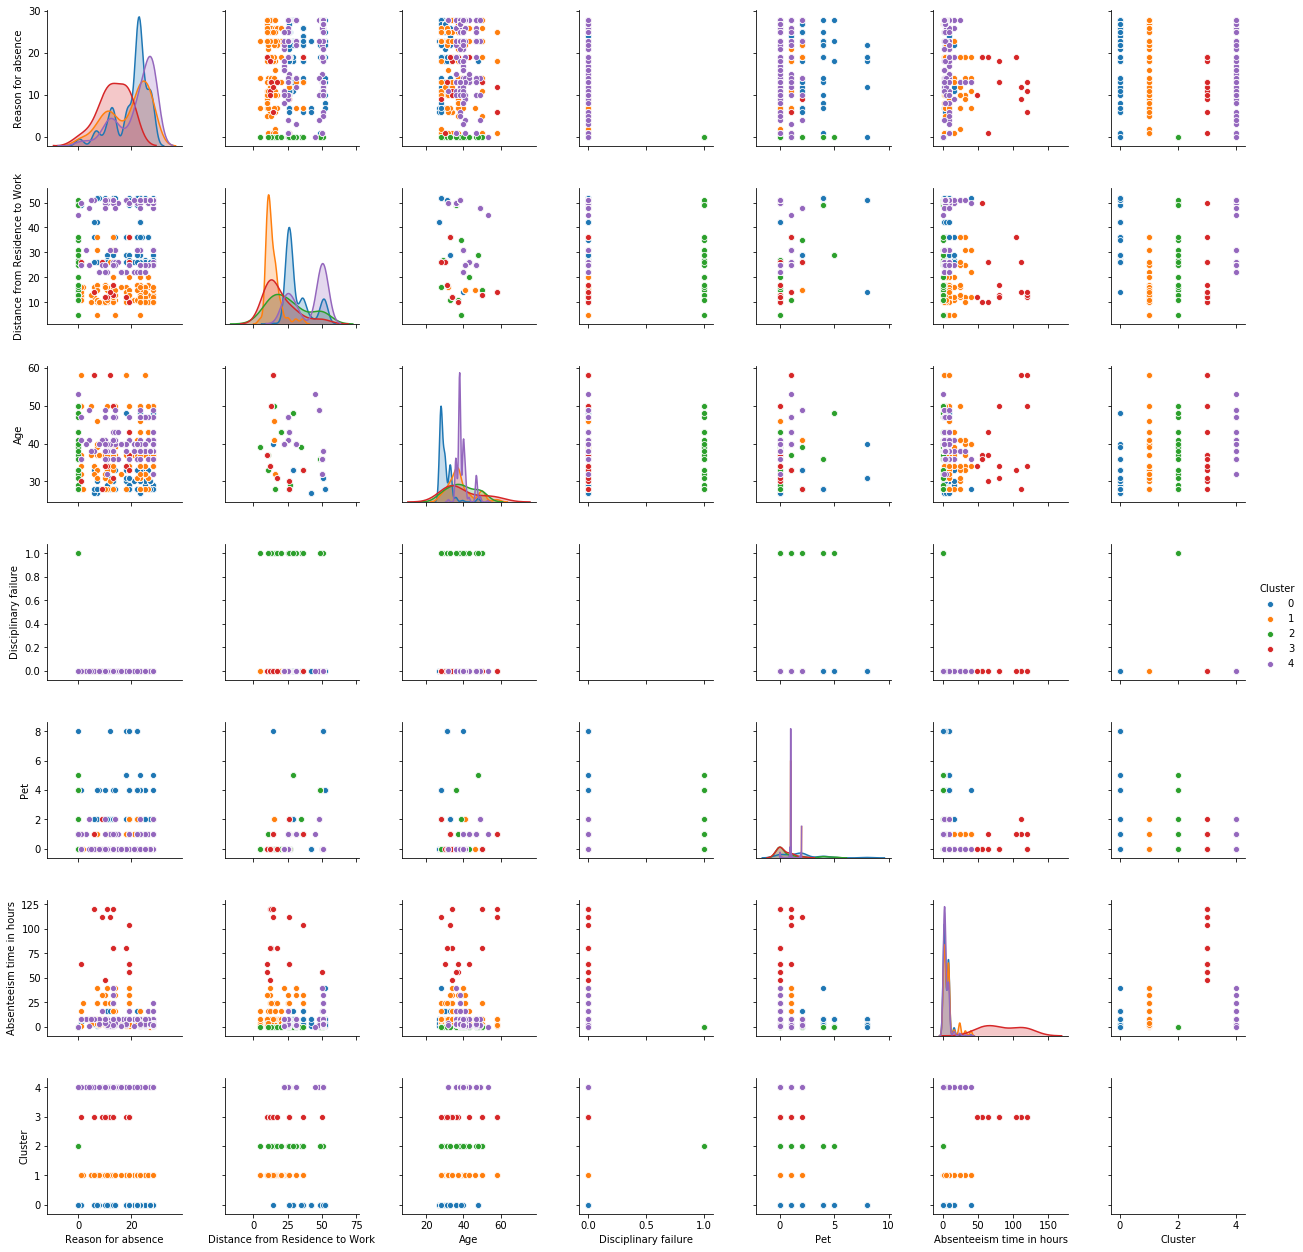

In [264]:
cols = list(data_in.columns)
sns.pairplot( data_in[cols], hue="Cluster")

In [266]:
data_in.groupby('Cluster').mean()

,Reason for absence,Distance from Residence to Work,Age,Disciplinary failure,Pet,Absenteeism time in hours
Cluster,,,,,,
0,20.224299,32.518692,30.130841,0.0,1.864486,4.939252
1,18.800948,13.990521,38.374408,0.0,0.208531,7.601896
2,0.000000,26.125000,39.275000,1.0,0.850000,0.000000
3,13.400000,19.400000,39.533333,0.0,0.400000,85.333333
4,22.015385,41.076923,39.476923,0.0,0.265385,4.550000
